__If you are reading this on github, please follow [this link to the exact same notebook on Kaggle](https://www.kaggle.com/patrikdurdevic/the-titanic-tensorflow-deep-learning-crisp-dm).__<br>
_This is one my first full Data Science analysis. Please feel free to share your feedback. Enjoy the journey!_
# 👋🛳️ Ahoy! The Titanic disaster Story
_In addition to telling an interesting story, my goal is to follow the [CRISP-DM](https://www.sv-europe.com/crisp-dm-methodology/) methodology as much as possible._

### RMS Titanic
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.

Titanic was under the command of Capt. Edward Smith, who also went down with the ship. The ocean liner carried some of the wealthiest people in the world, as well as hundreds of emigrants from Great Britain and Ireland, Scandinavia and elsewhere throughout Europe, who were seeking a new life in the United States. The first-class accommodation was designed to be the pinnacle of comfort and luxury, with a gymnasium, swimming pool, libraries, high-class restaurants and opulent cabins. A high-powered radiotelegraph transmitter was available for sending passenger "marconigrams" and for the ship's operational use. Although Titanic had advanced safety features, such as watertight compartments and remotely activated watertight doors, it only carried enough lifeboats for 1,178 people—about half the number on board, and one third of her total capacity—due to the maritime safety regulations of those days. The ship carried 16 lifeboat davits which could lower three lifeboats each, for a total of 48 boats. However, Titanic carried only a total of 20 lifeboats, four of which were collapsible and proved hard to launch during the sinking. (source: [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic))

### Challenge
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

On the first glance, we can anticipate that more women and children survived compared to men because of the [women and children first](https://en.wikipedia.org/wiki/Women_and_children_first) approach to loading the lifeboats. Our goal throughout this journey is to explore the available data, detect possible anomalies, feature engineer additional helpful information and at the end create a Deep learning predictive model to predict who is most likely to survive based on the provided test dataset.

# Data understanding
We will start by importing the required libraries and loading the provided csv dataset.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # Deep learning
import matplotlib.pyplot as plt # Plots
import math # Basic math
%matplotlib inline
import seaborn as sns # Plots

data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__In the dataset we are introduced to 12 different properties, let's first explain each one of them so that we can better understand what's going on.__

* __PassengerId__: _A unique id for every passenger_
* __Survived__: _Whether the passenger survived (1 or 0)_
* __Pclass__: _The ticket class (1, 2 or 3 -> 1st, 2nd or 3rd)_
* __Name__
* __Sex__
* __Age__
* __SibSp__: _Number of siblings / spouses aboard the Titanic_
* __Parch__: _Number of parents / children aboard the Titanic_
* __Ticket__: _Ticket number_
* __Fare__: _Passenger fare_
* __Cabin__: _Cabin number_
* __Embarked__: _Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)_

Let's first explore each property individually.

## PassengerId
Since this is only showing us the unique ID of each passenger, it's pretty much useless and doesn't in any way influence the survival (IDs could be shuffled).

## Survived
There is not much we can do with this data, so let's visualise it and see the ratio of people who survived with others.

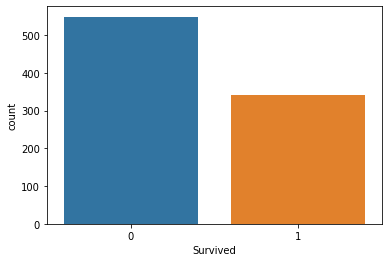

In [0]:
sns.countplot(x="Survived", data=data)

We can see that there are quite more people who lost their life comparet to the survivals. To be exact, the difference is 207 people.

## Ticket class

This could later prove to be an important piece of data since the higher ticket class could have meant higher priority when it came to boarding the lifeboats.

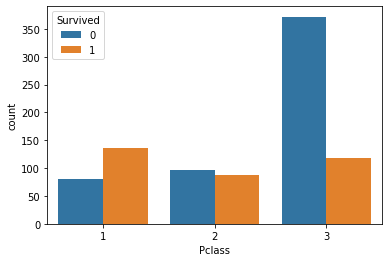

In [0]:
sns.countplot(x="Pclass", hue="Survived", data=data)

## Name
At first, this seems as quite unimportant, similar to PassengerId, but let's just see some names of people aboard the ship.

In [0]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Upon closer inspection, we can see the Rev. title. Let's [investigate](https://en.wikipedia.org/wiki/The_Reverend). Interesting... it is used as a prefix to the names of Christian clergy and ministers. Let's dig deeper.

In [0]:
data.Name.values[240:250]

array(['Zabour, Miss. Thamine', 'Murphy, Miss. Katherine "Kate"',
       'Coleridge, Mr. Reginald Charles', 'Maenpaa, Mr. Matti Alexanteri',
       'Attalah, Mr. Sleiman', 'Minahan, Dr. William Edward',
       'Lindahl, Miss. Agda Thorilda Viktoria',
       'Hamalainen, Mrs. William (Anna)', 'Beckwith, Mr. Richard Leonard',
       'Carter, Rev. Ernest Courtenay'], dtype=object)

After looking into the data, we can see that some people were doctors. That is a really important piece of information since they could be more educated about survival methods. This is for sure something we can use in the __feature engineering__ stage so we'll keep this in mind.

## Sex
Let's compare the ratio of men and women. It would be interesting to compare the number of men and women who survived versus the ones who lost their life (unfortunately for some, we won't dig too deep into this kind of analysis because we will leave most of the work to the Deep learning model)

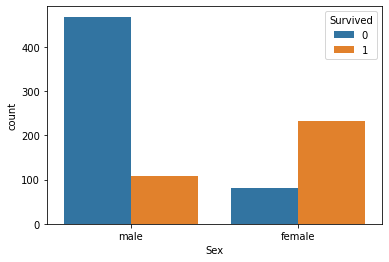

In [0]:
sns.countplot(x="Sex", hue="Survived", data=data)

### First discovery
We can immediately see that there is a greater chance for women to survive compared to men, most of whom died in the disaster.

## Age
Let's further look into the demographics and see the age distribution.

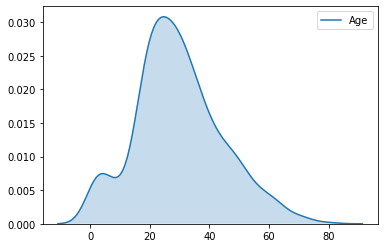

In [0]:
sns.kdeplot(data=data.Age, shade=True)

Unfortunately, ages of 177 people are not given which is a shame because intuitively this can be a really good indicator of survival ([women and children first](https://en.wikipedia.org/wiki/Women_and_children_first) approach). Let's compare survival rates for each age group.

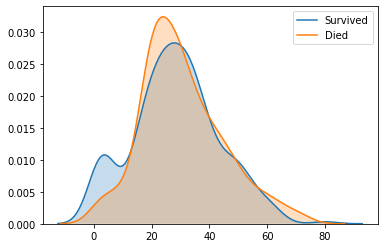

In [0]:
sns.kdeplot(data=data.loc[data['Survived'] == 1].Age, label="Survived", shade=True)
sns.kdeplot(data=data.loc[data['Survived'] == 0].Age, label="Died", shade=True)

Based on the distribution we can clearly see that kids up to the age of approximately 15 had a greater chance of survival. Let's check the correlation between age and survival.

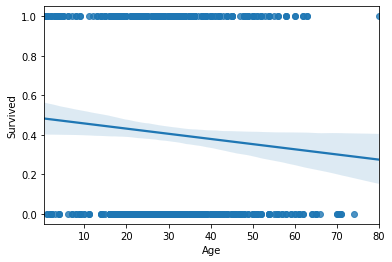

In [0]:
sns.regplot(x=data['Age'], y=data['Survived'])

Based on the scatter plot with the regression line we can with high certainty assume that age was an important factor for surviving the wreck.

## Age and Sex
Out of curiosity, let's see what happens when we try to combine age and sex values.

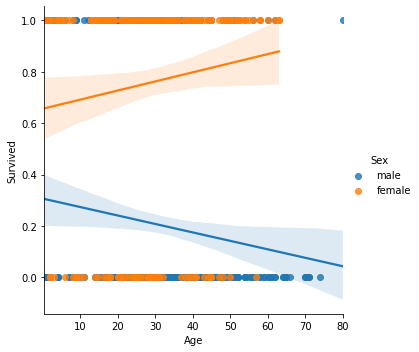

In [0]:
sns.lmplot(x="Age", y="Survived", hue="Sex", data=data)

### Correlation between age, sex and survival rate
Very interesting, we can make two very important observations of this graph:
* As women get older, we have an increase in survival rate whereas
* As men get older, there is a decrease in survival rate

## Siblings and spouses & Parents and children
Let's see what do we have here.

In [0]:
data.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [0]:
data.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

We can see that most people had little to no siblings or spouses aboard the Titanic. The same can be said for parents and children.

## Passenger fare
On the first glance, this is probably connected to the ticket class and should yield similar observations.

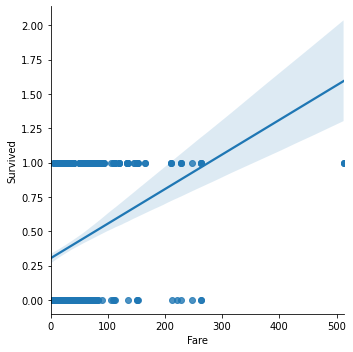

In [0]:
sns.lmplot(x="Fare", y="Survived", data=data)

## Cabin number
This can be interesting. Let's see what's provided to us.

In [0]:
data.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

Unfortunately we have the data for only about 23% of the passengers.

In [0]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

After a little bit of [research](https://www.encyclopedia-titanica.org/titanic-deckplans/) we can see that the letters correspond to different decks. This will probably correlate to the survival. We'll keep an eye out on this during the data preparation stage.

## Port
This is not a good indicator and would probably cause data leakage if we were to include it in the model training.

# Data preparation

## Selecting the important data
During the data understanding stage, we realised that some columns are in practice useless and now we are going to remove them from the dataset.

In [0]:
columnFilter = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]
filteredData = data[columnFilter]
filteredTestData = test_data[columnFilter[1:]]
filteredData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## Data cleaning
In this stage we are going to do some data cleanup. At the end, we are going to have data ready for our deep learning model.

In [0]:
filteredData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Let's at first [one hot encode](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/) the Pclass attribute.

In [0]:
def oneHotEncode(dataToEncode, column):
    onehot = pd.get_dummies(dataToEncode[column])
    dataToEncode = dataToEncode.join(onehot)
    dataToEncode = dataToEncode.drop(columns=column)
    return dataToEncode

filteredData = oneHotEncode(filteredData, "Pclass")
filteredData.head()

,Survived,Sex,Age,SibSp,Parch,1,2,3
0,0,male,22.0,1,0,0,0,1
1,1,female,38.0,1,0,1,0,0
2,1,female,26.0,0,0,0,0,1
3,1,female,35.0,1,0,1,0,0
4,0,male,35.0,0,0,0,0,1


Next we are going to convert the sex attribute to number since our model requires values to be integers.

In [0]:
def sex_to_numerical(d):
    sex = d["Sex"]
    if sex == "male":
        return 1
    return 0

filteredData['Sex'] = filteredData.apply(sex_to_numerical, axis=1)
filteredData.head()

,Survived,Sex,Age,SibSp,Parch,1,2,3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1


At last, we are going to fill the missing age attributes with the mean values and normalize the data because [normalized data performs better on the deep learning models](https://mc.ai/why-data-normalization-is-necessary-for-machine-learning-models/).

In [0]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(dataToNormalize):
    scaler = MinMaxScaler()
    dataToNormalize["Age"] = scaler.fit_transform(dataToNormalize["Age"].values.reshape(-1,1))
    return dataToNormalize

filteredData.Age.fillna((filteredData['Age'].mean()), inplace=True)

filteredData = normalize_age(filteredData)
filteredData.head()

,Survived,Sex,Age,SibSp,Parch,1,2,3
0,0,1,0.271174,1,0,0,0,1
1,1,0,0.472229,1,0,1,0,0
2,1,0,0.321438,0,0,0,0,1
3,1,0,0.434531,1,0,1,0,0
4,0,1,0.434531,0,0,0,0,1


## Feature engineering
Unfortunately, I can hardly see feature engineering making an impact on our predictions. For that reason, I'm not going to get into it this time. Here are some of the reasons:
* It would be cool to extract the deck on which people were located, but we are provided with that sort of data for only a small fraction of the people
* I don't see extracting the Dr. title from the names being beneficial to our model for the same reason (very small amount of people have a specific title which would intuitively make an impact on the chances of survival)

## Training and validation data


In [0]:
from sklearn.model_selection import train_test_split
X = filteredData[filteredData.columns[1:]]
y = filteredData[filteredData.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Modelling

## Let's create a deep learning model

Since my goal for this task is to create a __deep learning__ model, i wanted to create a model which has more than only 1 layer. After some tweaking, I settled for 6, combining the dense layers with dropout layers and the sigmoid activation function at the end. I am using dropout layers to [prevent the model from overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit). Finally I decided to go for [Adam optimizer (adaptive gradient descent)](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) with the [BinaryCrossentropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) function (complementing the final sigmoid activation function).

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 1ms/sample - loss: 0.7469 - accuracy: 0.6138 - val_loss: 0.7379 - val_accuracy: 0.6257
Epoch 2/100
712/712 [==============================] - 0s 87us/sample - loss: 0.7119 - accuracy: 0.6138 - val_loss: 0.6968 - val_accuracy: 0.6257
Epoch 3/100
712/712 [==============================] - 0s 84us/sample - loss: 0.6895 - accuracy: 0.6138 - val_loss: 0.6778 - val_accuracy: 0.6257
Epoch 4/100
712/712 [==============================] - 0s 84us/sample - loss: 0.6792 - accuracy: 0.6138 - val_loss: 0.6628 - val_accuracy: 0.6257
Epoch 5/100
712/712 [==============================] - 0s 84us/sample - loss: 0.6712 - accuracy: 0.6138 - val_loss: 0.6565 - val_accuracy: 0.6257
Epoch 6/100
712/712 [==============================] - 0s 84us/sample - loss: 0.6644 - accuracy: 0.6180 - val_loss: 0.6531 - val_accuracy: 0.6648
Epoch 7/100
712/712 [==============================] - 0s 86us/sample - loss: 0

# Evaluation
Let's check how our model did on the validation part of the dataset.

179/179 - 0s - loss: 0.6250 - accuracy: 0.8156

Test accuracy: 0.8156425


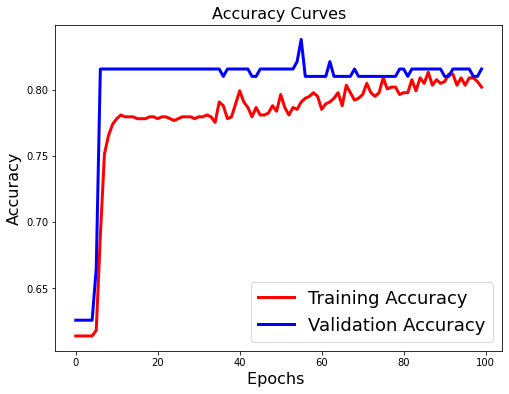

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

We can see that by using dropout layers we prevented it from overfitting, exactly what we've wanted.

# Deployment
Let's predict the testing dataset.

## Preparation
First we need to prepare the test data.

In [0]:
filteredTestData = oneHotEncode(filteredTestData, "Pclass")
filteredTestData['Sex'] = filteredTestData.apply(sex_to_numerical, axis=1)
filteredTestData.Age.fillna((filteredTestData['Age'].mean()), inplace=True)
filteredTestData = normalize_age(filteredTestData)

Now let's train the model on the whole dataset so that we can get the most out of what we've got.

In [0]:
model.fit(X, y, epochs=100)

Train on 891 samples
Epoch 1/100
891/891 [==============================] - 0s 70us/sample - loss: 0.6239 - accuracy: 0.8070
Epoch 2/100
891/891 [==============================] - 0s 72us/sample - loss: 0.6248 - accuracy: 0.8114
Epoch 3/100
891/891 [==============================] - 0s 79us/sample - loss: 0.6243 - accuracy: 0.8114
Epoch 4/100
891/891 [==============================] - 0s 73us/sample - loss: 0.6231 - accuracy: 0.8148
Epoch 5/100
891/891 [==============================] - 0s 69us/sample - loss: 0.6236 - accuracy: 0.8137
Epoch 6/100
891/891 [==============================] - 0s 64us/sample - loss: 0.6240 - accuracy: 0.8148
Epoch 7/100
891/891 [==============================] - 0s 64us/sample - loss: 0.6238 - accuracy: 0.8092
Epoch 8/100
891/891 [==============================] - 0s 65us/sample - loss: 0.6252 - accuracy: 0.8036
Epoch 9/100
891/891 [==============================] - 0s 63us/sample - loss: 0.6250 - accuracy: 0.8036
Epoch 10/100
891/891 [=====================

## Inference

Let's finally run the prediction on the test dataset.

In [0]:
predictions = model.predict(filteredTestData)
predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

Finally we have to do turn our predictions into the specified output CSV format.

In [0]:
predictions = pd.DataFrame(predictions).rename(columns={0: "Survived"})
predictions.index.name ="PassengerId"
predictions.index += 892
predictions.to_csv("predictions.csv")
predictions

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


# Final words
The deep learning model is probably not the best fit for this kind of classification task due to the small amount of data we are left with to model. Nevertheless, this is a great exercise for deep learning and I hope that you had fun reading the analysis and learned something new! :D